### Zomato Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vivek\AppData\Local\Temp\ipykernel_8616\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import dataset

df = pd.read_csv(r"C:\Users\vivek\Downloads\End-to-End-Zomato-Data-Analysis\Dataset\Zomato_dataset.csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [5]:
# check null values

df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

**remove '/5' and convert the 'rate' column to float**

In [6]:
df['rate'] = df['rate'].str.replace('/5','').astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\vivek\AppData\Local\Temp\ipykernel_8616\1836746405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='listed_in(type)', data=df, palette='Set2')


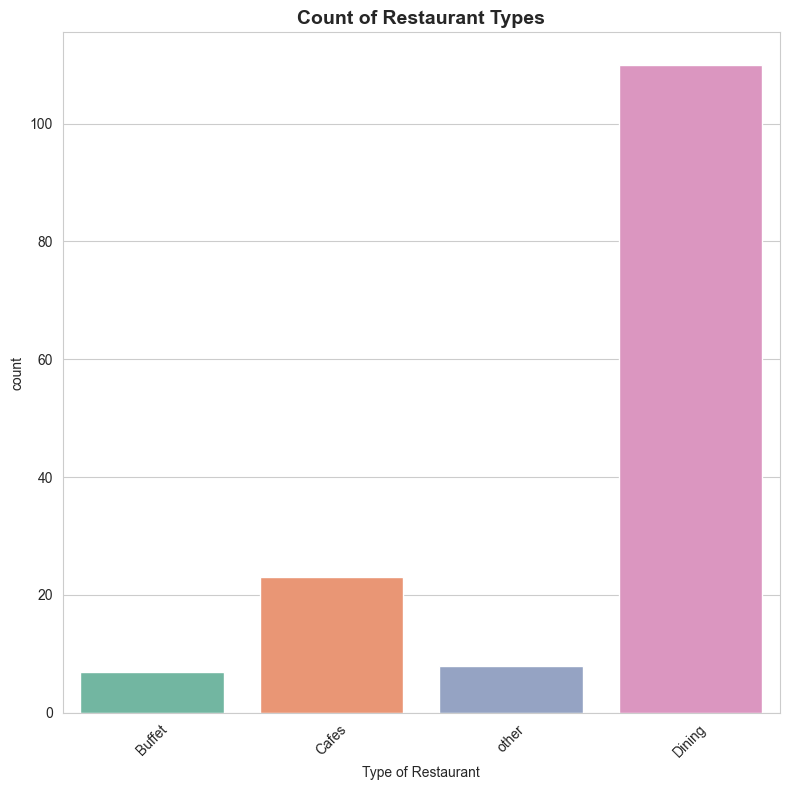

In [9]:
# set a seaborn style
sns.set_style("whitegrid")

# set figure size
plt.figure(figsize=(8, 8))

# create countplot with color palette
sns.countplot(x='listed_in(type)', data=df, palette='Set2')

# add title and labels
plt.title("Count of Restaurant Types", fontsize=14, weight='bold')
plt.xlabel("Type of Restaurant")
plt.xticks(rotation=45)  # Optional: rotate x-labels for readability
plt.tight_layout()
plt.show()


### Dining appears to be most frequent type of resturent

In [10]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [11]:
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().reset_index()
votes_by_type = votes_by_type.sort_values(by='votes', ascending=False)
votes_by_type

,listed_in(type),votes
2,Dining,20363
3,other,9367
1,Cafes,6434
0,Buffet,3028


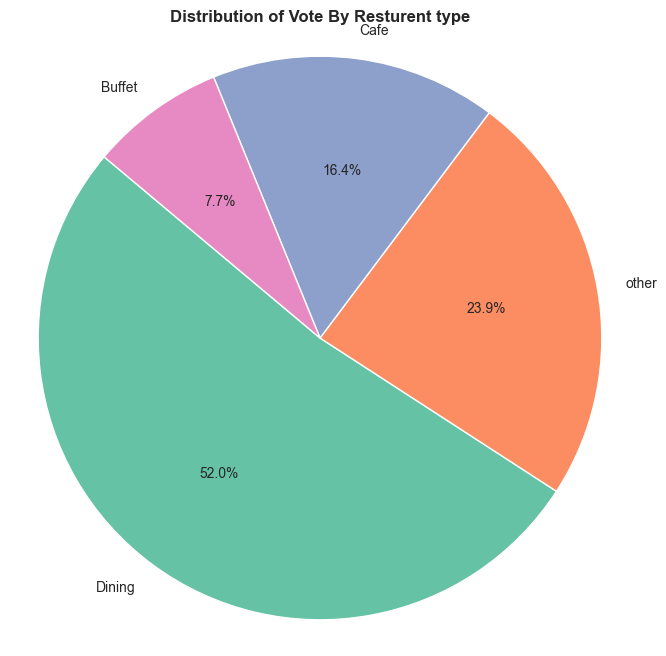

In [12]:
lables = ['Dining', 'other', 'Cafe', 'Buffet']
sizes = [20363,9367,6434,3028]


# pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=lables, autopct='%1.1f%%',startangle=140,colors=sns.color_palette('Set2'))
plt.title('Distribution of Vote By Resturent type', weight='bold')
plt.axis('equal')
plt.show()

### Dining Resturent has Recived maxium votes

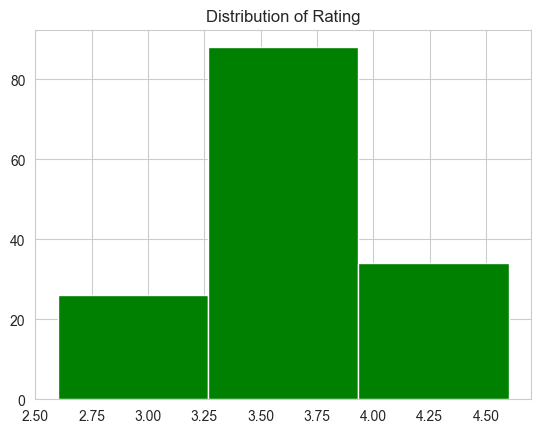

In [13]:
plt.title('Distribution of Rating')
plt.hist(df['rate'],bins=3,color='g')
plt.show()


### Majority resturent recieved from 3.50 to 4

**average order by couples**

In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


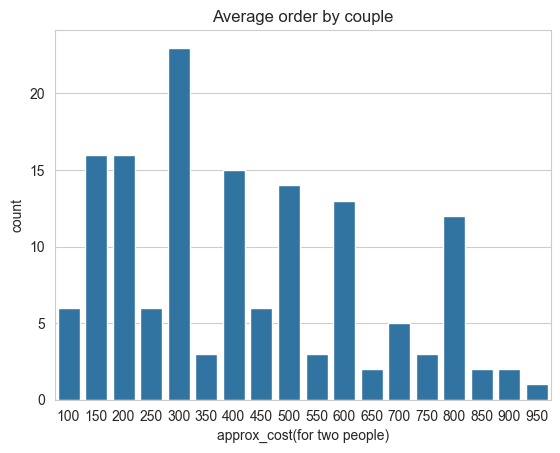

In [15]:
couple_avg_cost = df['approx_cost(for two people)']
sns.countplot(x=couple_avg_cost)
plt.title("Average order by couple")
plt.show()

**which order status have maximum rating**

In [16]:
plt.boxplot

<function matplotlib.pyplot.boxplot(x: 'ArrayLike | Sequence[ArrayLike]', *, notch: 'bool | None' = None, sym: 'str | None' = None, vert: 'bool | None' = None, orientation: "Literal['vertical', 'horizontal']" = 'vertical', whis: 'float | tuple[float, float] | None' = None, positions: 'ArrayLike | None' = None, widths: 'float | ArrayLike | None' = None, patch_artist: 'bool | None' = None, bootstrap: 'int | None' = None, usermedians: 'ArrayLike | None' = None, conf_intervals: 'ArrayLike | None' = None, meanline: 'bool | None' = None, showmeans: 'bool | None' = None, showcaps: 'bool | None' = None, showbox: 'bool | None' = None, showfliers: 'bool | None' = None, boxprops: 'dict[str, Any] | None' = None, tick_labels: 'Sequence[str] | None' = None, flierprops: 'dict[str, Any] | None' = None, medianprops: 'dict[str, Any] | None' = None, meanprops: 'dict[str, Any] | None' = None, capprops: 'dict[str, Any] | None' = None, whiskerprops: 'dict[str, Any] | None' = None, manage_ticks: 'bool' = Tru